<h1><center>IF3270 - Pembelajaran Mesin</center></h1><h2><center>Tugas Besar IIA : Implementasi K-Means</center></h2><hr>
<h3>Anggota Kelompok</h3>

<ol>
    <li> 13517028 - Muhammad Akmal
    <li> 13517052 - Haris Salman Al-Ghifary
    <li> 13517061 - Hafidh Rendyanto
    <li> 13517112 - Muhammad Nurdin Husen
</ol>


> Import Library

In [1]:

from itertools import permutations
import performance as pm
import numpy as np
import copy
import pandas as pd
import math
import random
import myKMeans
import matplotlib.pyplot as plt
from sklearn import preprocessing

> Membaca dataset

In [2]:
iris = pd.read_csv('data/Iris.csv')       #load data dari file csv
pd.set_option('display.max_rows', None)   #menset agar max_rows tidak di display
iris_process = iris.iloc[:,1:5]           #membuang label data untuk keperluan training
iris_label = iris.iloc[:,5]               #label data

> Melakukan *clustering* dengan algoritma **K-Means**

In [3]:
kMeans = myKMeans.KMeans(iris_process.to_numpy(), 3)         #K-means dengan nilai k=3

In [4]:
cluster = pd.DataFrame(kMeans.group, columns=["Cluster"])  #Membuat dataframe cluster hasil pembelajaran
data = iris_process.join(iris_label).join(cluster)   #Menambahkan kolom label dan cluster ke data awal

> Mengubah *cluster* menjadi label yang bersesuaian. <br>
> Akan dicari kesesuaian antara *cluster* dengan label. <br>
> Misalkan, *cluster 0* setara dengan *label x*. <br>
> Proses pencarian dengan menghitung semua kemungkinan yang ada dan dipilih yang akurasinya maksimum. <br>

In [5]:
dataClustered,akurasi = pm.convertCluster(data.to_numpy())             #konversi kluster yang didaapat dan menghitung akurasi
dataClustered = pd.DataFrame(data=dataClustered,columns=data.columns)  #mengubah ke data frame
print("Akurasi Clustering : {:.2f}".format(akurasi))                   #mencetak akurasi

Akurasi Clustering : 0.89


In [6]:
dataClustered

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Cluster
0,5.1,3.5,1.4,0.2,Iris-setosa,Iris-setosa
1,4.9,3,1.4,0.2,Iris-setosa,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa,Iris-setosa
4,5,3.6,1.4,0.2,Iris-setosa,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa,Iris-setosa
7,5,3.4,1.5,0.2,Iris-setosa,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa,Iris-setosa


> Melakukan pengujian kualitas model secara **ektrinsik** menggunakan Fowlkes-Mallows Index <br>
> $FMI = TP/(\sqrt((TP+FP)*(TP+FN)))$

In [7]:
fmi = pm.calculateFMI(dataClustered.to_numpy())           #menghitung FMI untuk setiap klaster
fmi = pd.DataFrame(data=fmi, columns=['Cluster', 'FMI'])  #mengkonversi menjadi data frame
fmi

,Cluster,FMI
0,Iris-setosa,1.00
1,Iris-versicolor,0.85
2,Iris-virginica,0.82
3,Rata-rata,0.89


> Melakukan pengujian kualitas model secara **intrinsik** menggunakan koefisien silhoutte <br>
> $SillhoutteCoef = (b-a)/(max(a,b))$ <br>
> a : jarak rata-rata objek dengan objek lain *dalam satu klaster*<br>
> b : jarak rata-rata objek dengan objek lain *pada inter-klaster terdekat*

In [8]:
data_with_cluster =dataClustered.iloc[:,0:4].join(dataClustered.iloc[:,-1]) #mengambil hanya properti data dan clasternya
silhoutte = pm.calculateSilhoutte(data_with_cluster.to_numpy())                             #menghitung silhoutte coef untuk setiap objek
silhoutte = pd.DataFrame(data=silhoutte,columns=['Silhoutte Coef'])         #mengkonversi ke data frame
dataClustered.join(silhoutte)                                               #menambahkan kolom silhoutte ke data terklaster

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Cluster,Silhoutte Coef
0,5.1,3.5,1.4,0.2,Iris-setosa,Iris-setosa,0.846145
1,4.9,3,1.4,0.2,Iris-setosa,Iris-setosa,0.807855
2,4.7,3.2,1.3,0.2,Iris-setosa,Iris-setosa,0.821541
3,4.6,3.1,1.5,0.2,Iris-setosa,Iris-setosa,0.795010
4,5,3.6,1.4,0.2,Iris-setosa,Iris-setosa,0.840917
5,5.4,3.9,1.7,0.4,Iris-setosa,Iris-setosa,0.739092
6,4.6,3.4,1.4,0.3,Iris-setosa,Iris-setosa,0.814494
7,5,3.4,1.5,0.2,Iris-setosa,Iris-setosa,0.847805
8,4.4,2.9,1.4,0.2,Iris-setosa,Iris-setosa,0.738739
9,4.9,3.1,1.5,0.1,Iris-setosa,Iris-setosa,0.822828


In [9]:
silhoutte.mean()

Silhoutte Coef    0.552505
dtype: float64

<h3><center>VISUALISASI</center></h3>

> Data Preprocessing

In [10]:
le = preprocessing.LabelEncoder()
# Converting string labels into numbers.
iris.Species = le.fit_transform(iris.Species)
dataClustered.Cluster = le.fit_transform(dataClustered.Cluster)

> Data Awal

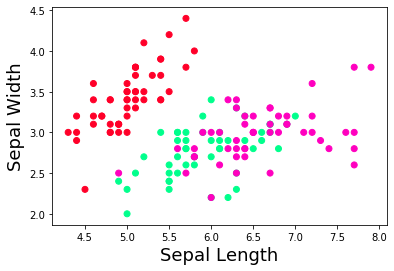

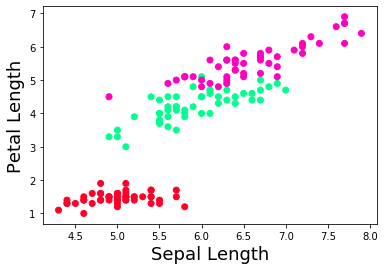

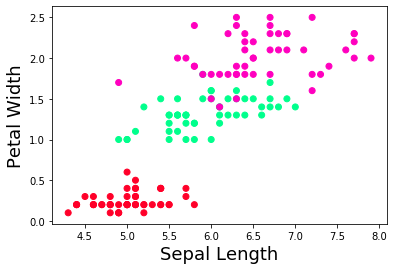

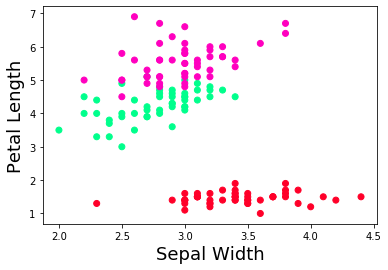

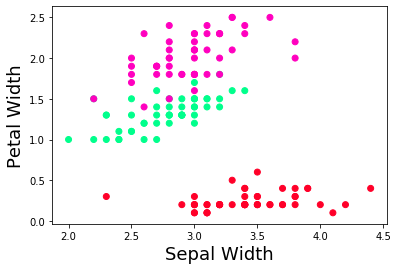

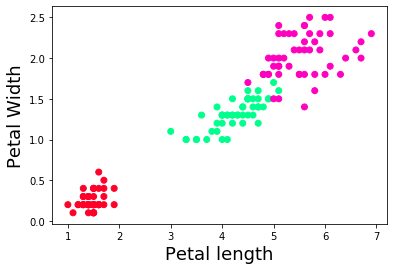

In [11]:
ax = plt.subplot()
plt.scatter(iris.iloc[:,1], iris.iloc[:,2], c=iris.iloc[:,5], cmap='gist_rainbow')
plt.xlabel('Sepal Length', fontsize=18)
plt.ylabel('Sepal Width', fontsize=18)
plt.show()

ax = plt.subplot()
plt.scatter(iris.iloc[:,1], iris.iloc[:,3], c=iris.iloc[:,5], cmap='gist_rainbow')
plt.xlabel('Sepal Length', fontsize=18)
plt.ylabel('Petal Length', fontsize=18)
plt.show()

ax = plt.subplot()
plt.scatter(iris.iloc[:,1], iris.iloc[:,4], c=iris.iloc[:,5], cmap='gist_rainbow')
plt.xlabel('Sepal Length', fontsize=18)
plt.ylabel('Petal Width', fontsize=18)
plt.show()

ax = plt.subplot()
plt.scatter(iris.iloc[:,2], iris.iloc[:,3], c=iris.iloc[:,5], cmap='gist_rainbow')
plt.xlabel('Sepal Width', fontsize=18)
plt.ylabel('Petal Length', fontsize=18)
plt.show()

ax = plt.subplot()
plt.scatter(iris.iloc[:,2], iris.iloc[:,4], c=iris.iloc[:,5], cmap='gist_rainbow')
plt.xlabel('Sepal Width', fontsize=18)
plt.ylabel('Petal Width', fontsize=18)
plt.show()

ax = plt.subplot()
plt.scatter(iris.iloc[:,3], iris.iloc[:,4], c=iris.iloc[:,5], cmap='gist_rainbow')
plt.xlabel('Petal length', fontsize=18)
plt.ylabel('Petal Width', fontsize=18)
plt.show()

> Hasil k-means

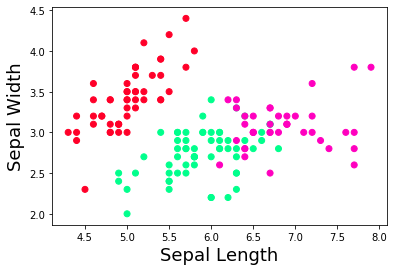

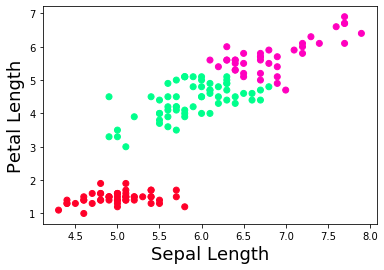

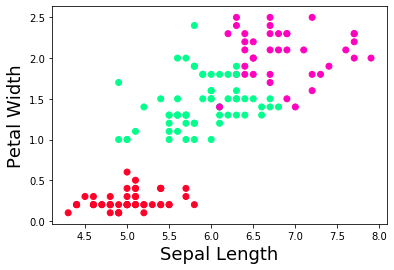

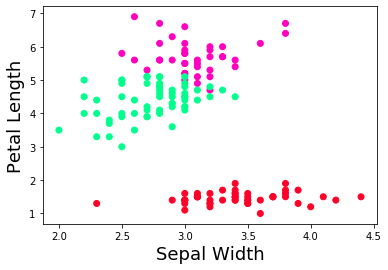

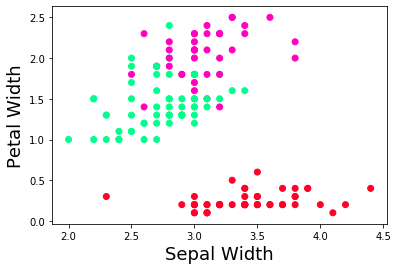

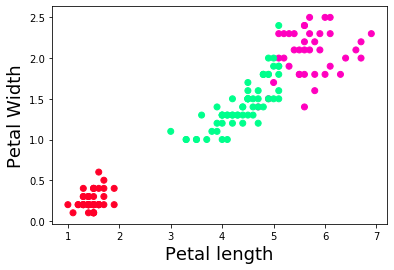

In [12]:
ax = plt.subplot()
plt.scatter(iris.iloc[:,1], iris.iloc[:,2], c=dataClustered.iloc[:,-1], cmap='gist_rainbow')
plt.xlabel('Sepal Length', fontsize=18)
plt.ylabel('Sepal Width', fontsize=18)
plt.show()

ax = plt.subplot()
plt.scatter(iris.iloc[:,1], iris.iloc[:,3], c=dataClustered.iloc[:,-1], cmap='gist_rainbow')
plt.xlabel('Sepal Length', fontsize=18)
plt.ylabel('Petal Length', fontsize=18)
plt.show()

ax = plt.subplot()
plt.scatter(iris.iloc[:,1], iris.iloc[:,4], c=dataClustered.iloc[:,-1], cmap='gist_rainbow')
plt.xlabel('Sepal Length', fontsize=18)
plt.ylabel('Petal Width', fontsize=18)
plt.show()

ax = plt.subplot()
plt.scatter(iris.iloc[:,2], iris.iloc[:,3], c=dataClustered.iloc[:,-1], cmap='gist_rainbow')
plt.xlabel('Sepal Width', fontsize=18)
plt.ylabel('Petal Length', fontsize=18)
plt.show()

ax = plt.subplot()
plt.scatter(iris.iloc[:,2], iris.iloc[:,4], c=dataClustered.iloc[:,-1], cmap='gist_rainbow')
plt.xlabel('Sepal Width', fontsize=18)
plt.ylabel('Petal Width', fontsize=18)
plt.show()

ax = plt.subplot()
plt.scatter(iris.iloc[:,3], iris.iloc[:,4], c=dataClustered.iloc[:,-1], cmap='gist_rainbow')
plt.xlabel('Petal length', fontsize=18)
plt.ylabel('Petal Width', fontsize=18)
plt.show()